## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "F:/camp/hw/hw5/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "F:/camp/hw/hw5/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
combined_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice in the DataFrame.
len(combined_mouse_df["Mouse ID"].unique())

249

In [4]:
# a = combined_mouse_df.loc[(combined_mouse_df["Timepoint"]==0)]["Mouse ID"].value_counts()
# # name=[]
# # for i in a:
# #     if a[i]>1:
# #         name.append()
# list(a.index)
time_list = list(combined_mouse_df["Timepoint"].unique())
dup_mice = []
combined_mouse_df.loc[(combined_mouse_df["Timepoint"]==0)].head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

time_list = list(combined_mouse_df["Timepoint"].unique())
dup_mice = []
for the_time in time_list:
    temp_df = combined_mouse_df.loc[(combined_mouse_df["Timepoint"]==the_time)]
    a = temp_df.loc[(temp_df["Timepoint"]==0)]["Mouse ID"].value_counts()
    a_index =list(a.index)
    for names in a_index:
        if a[names]>1:
            dup_mice.append(names)
dup_mice  

['g989']

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_info = combined_mouse_df.loc[(combined_mouse_df["Mouse ID"]=='g989')]
dup_mice_info

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_info = combined_mouse_df.loc[(combined_mouse_df["Mouse ID"]!='g989')]
clean_mice_info.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
len(clean_mice_info["Mouse ID"].unique())

248

## Summary Statistics

In [9]:
# Build basic df
stat_df = pd.DataFrame(
    {"related_statics":["mean", 'median','variance', 'standard deviation','standard error of the mean'],
          }
)

stat_df  = stat_df.set_index('related_statics',drop=True)
stat_df 

""
related_statics
mean
median
variance
standard deviation
standard error of the mean


In [11]:
# Generate a summary statistics table of 1mean, 2median, 3variance, 4standard deviation, and SEM of the tumor volume for each regimen
from scipy.stats import sem
regimen_list = list(clean_mice_info["Drug Regimen"].unique())

for regi in regimen_list:
    temp_data = clean_mice_info.loc[clean_mice_info["Drug Regimen"] == regi, :]
    the_mean = temp_data['Tumor Volume (mm3)'].mean()
    the_median = temp_data['Tumor Volume (mm3)'].median()
    the_std = temp_data['Tumor Volume (mm3)'].std()
    the_var = temp_data['Tumor Volume (mm3)'].var()
    the_sem = sem(temp_data['Tumor Volume (mm3)'])
    stat_df.loc['mean',regi] = the_mean
    stat_df.loc['median',regi] = the_median
    stat_df.loc['standard deviation',regi] = the_std
    stat_df.loc['variance',regi] = the_var
    stat_df.loc['standard deviation',regi] = the_std
    stat_df.loc['standard error of the mean',regi] = the_sem
    
stat_df
    
# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Ramicane,Capomulin,Infubinol,Placebo,Ceftamin,Stelasyn,Zoniferol,Ketapril,Propriva,Naftisol
related_statics,,,,,,,,,,
mean,40.216745,40.675741,52.884795,54.033581,52.591172,54.233149,53.236507,55.235638,52.320930,54.331565
median,40.673236,41.557809,51.820584,52.288934,51.776157,52.431737,51.818479,53.698743,50.446266,52.509285
variance,23.486704,24.947764,43.128684,61.168083,39.290177,59.450562,48.533355,68.553577,43.852013,66.173479
standard deviation,4.846308,4.994774,6.567243,7.821003,6.268188,7.710419,6.966589,8.279709,6.622085,8.134708
standard error of the mean,0.320955,0.329346,0.492236,0.581331,0.469821,0.573111,0.516398,0.603860,0.544332,0.596466


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

#From shon:
# I got the table :)


## Bar Plots

In [ ]:
%matplotlib notebook

In [62]:

# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study 



Text(0, 0.5, '# of mice')

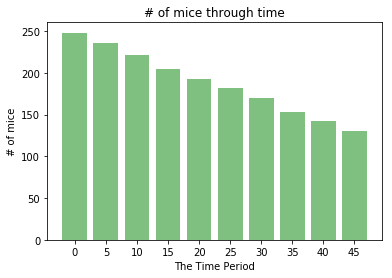

In [63]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study 
# using matplotlib
import numpy as np
micenum_info = []
for peri in periods_list:
    temp_data = clean_mice_info.loc[clean_mice_info["Timepoint"] == peri,:]
    the_micenum = len(temp_data['Mouse ID'].unique())
    micenum_info.append(the_micenum)
# micenum_info

# the bar
x_axis = np.arange(len(micenum_info))
x_axis
plt.bar(x_axis, micenum_info, color='g', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, list(clean_mice_info["Timepoint"].unique()))

plt.title("# of mice through time")
plt.xlabel("The Time Period")
plt.ylabel("# of mice")

<Figure size 432x288 with 0 Axes>

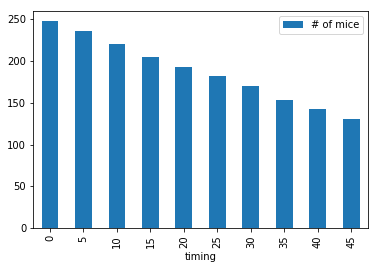

In [76]:
# using pandas.
# build df
the_period = list(clean_mice_info["Timepoint"].unique())
micenum_info
dict_mice ={"timing": the_period,'# of mice':micenum_info}

df_mice = pd.DataFrame(dict_mice)
df_mice = df_mice.set_index("timing")
plt.figure()
df_mice.plot(kind='bar')
plt.show()



In [77]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

# build df
x_axis =list( clean_mice_info["Drug Regimen"].unique())
y_axis =list( clean_mice_info["Timepoint"].unique())
stat_df = pd.DataFrame(
    {"time point":y_axis,
          }
)

stat_df  = stat_df.set_index('time point',drop=True)
for regi in regimen_list:
    temp_data = clean_mice_info.loc[clean_mice_info["Drug Regimen"] == regi, :]
    for timing in y_axis:
        temp_data2 = temp_data.loc[temp_data["Timepoint"] == timing, :]
        stat_df.loc[timing,regi] = len(temp_data2['Mouse ID'])

stat_df

,Ramicane,Capomulin,Infubinol,Placebo,Ceftamin,Stelasyn,Zoniferol,Ketapril,Propriva,Naftisol
time point,,,,,,,,,,
0,25.0,25.0,25.0,25.0,25.0,24.0,25.0,25.0,24.0,25.0
5,25.0,25.0,25.0,24.0,21.0,23.0,24.0,23.0,23.0,23.0
10,24.0,25.0,21.0,24.0,20.0,21.0,22.0,22.0,21.0,21.0
15,24.0,24.0,21.0,20.0,19.0,21.0,21.0,19.0,15.0,21.0
20,23.0,23.0,20.0,19.0,18.0,19.0,17.0,19.0,15.0,20.0
25,23.0,22.0,18.0,17.0,18.0,18.0,16.0,19.0,13.0,18.0
30,23.0,22.0,17.0,15.0,16.0,17.0,15.0,18.0,12.0,15.0
35,21.0,22.0,12.0,14.0,14.0,15.0,14.0,17.0,9.0,15.0
40,20.0,21.0,10.0,12.0,14.0,12.0,14.0,15.0,9.0,15.0


<Figure size 432x288 with 0 Axes>

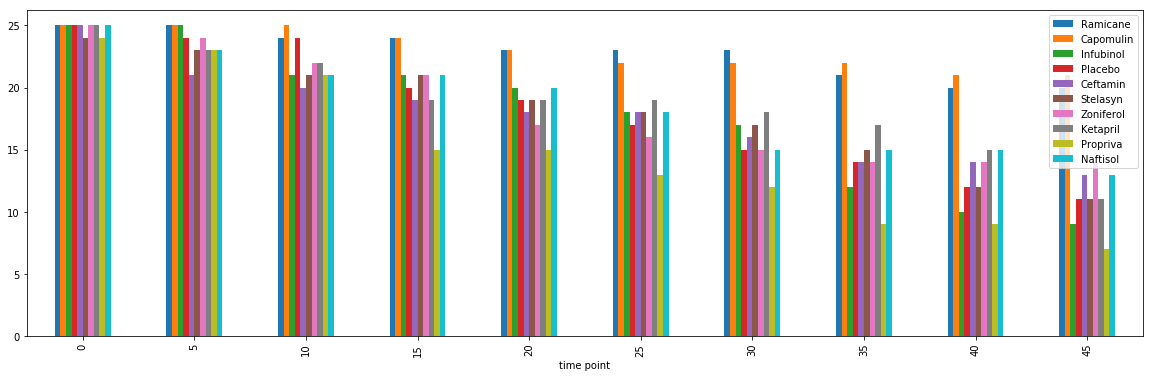

In [89]:
import pandas as pd
# using pandas
plt.figure()
stat_df.plot(kind='bar',figsize=(20,6))

plt.show()

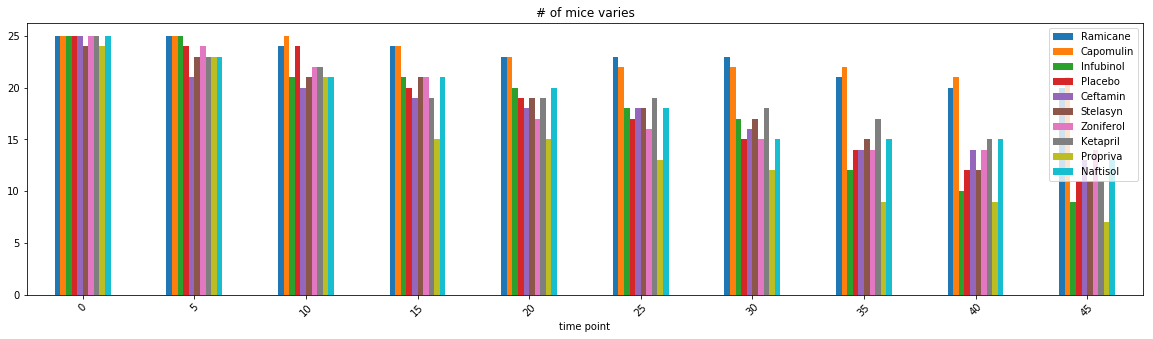

<Figure size 432x288 with 0 Axes>

In [48]:

# using pyplot.
multi_plot = stat_df.plot(kind="bar", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(y_axis, rotation=45)

plt.title("# of mice varies")

plt.show()
plt.tight_layout()

In [51]:
time_0 = clean_mice_info.loc[clean_mice_info["Timepoint"] == 0, :]
female_size = len(time_0.loc[time_0["Sex"] == 'Female', :]["Mouse ID"].unique())
female_size 

123

## Pie Plots

([<matplotlib.patches.Wedge at 0x1e68e346ef0>,
 [Text(-0.696335501700647, -0.8515379434125696, 'Male'),
  Text(0.7596387291279786, 0.9289504837228031, 'Female')])

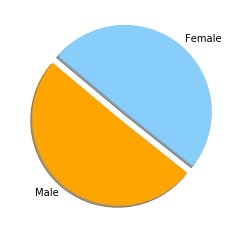

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart

labels = ["Male", "Female"]
# in the very beginning, the distribution is:
time_0 = clean_mice_info.loc[clean_mice_info["Timepoint"] == 0, :]
female_size = len(time_0.loc[time_0["Sex"] == 'Female', :]["Mouse ID"].unique())

male_size = len(time_0.loc[time_0["Sex"] == 'Male', :]["Mouse ID"].unique())

# The values of each section of the pie chart
sizes = [male_size, female_size]

# The colors of each section of the pie chart
colors = [ "orange",  "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = ( 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, startangle=140)




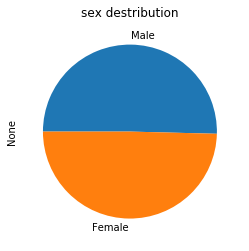

In [61]:
import pandas
# Generate a pie plot showing the distribution of female versus male mice using pandas
data1 = pd.Series({'Male':male_size,'Female':female_size})
data1.plot(kind = 'pie',radius = 1,startangle = 180, counterclock = False, title = 'sex destribution')

## Quartiles, Outliers and Boxplots

In [99]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 


# By comparing the survival rate, we know :
promising_regiment = ['Ramicane','Capomulin','Zoniferol','Ceftamin']
regi_r = clean_mice_info.loc[clean_mice_info["Drug Regimen"] == 'Ramicane']
regi_ca= clean_mice_info.loc[clean_mice_info["Drug Regimen"] == 'Capomulin']
regi_z = clean_mice_info.loc[clean_mice_info["Drug Regimen"] == 'Zoniferol']
regi_ce = clean_mice_info.loc[clean_mice_info["Drug Regimen"] == 'Ceftamin']

result0 = regi_r.append(regi_ca)
result1 = result0.append(regi_z)
result2 = result1.append(regi_ce)
result = result2.loc[result2["Timepoint"] == 45]
result['Tumor Volume (mm3)']

quartiles = result['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
maxt = result['Tumor Volume (mm3)'].max()
mint = result['Tumor Volume (mm3)'].min()

print(f"The lower quartile of tumor size is: {lowerq}")
print(f"The upper quartile of tumor size is: {upperq}")
print(f"The interquartile range of tumor size is: {iqr}")
print(f"The the median of tumor size is: {quartiles[0.5]} ")
print(f"The max of tumor size is: {maxt}")
print(f"The min of tumor size is: {mint}")

The lower quartile of tumor size is: 34.232074035
The upper quartile of tumor size is: 63.121691337499996
The interquartile range of tumor size is: 28.8896173025
The the median of tumor size is: 40.663359595 
The max of tumor size is: 73.32443228
The min of tumor size is: 22.05012627


In [128]:
# by calculate the IQR,（Q3 +1.5IQR）/（Q31-1.5IQR）, we can see there are no outliers

fin_tumor = result[["Drug Regimen","Tumor Volume (mm3)"]]
regi_r.iloc[:,0]
regi_r.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [145]:
range(len(regi_ca["Tumor Volume (mm3)"]))[0]
regi_r.iloc[0,6]
fin4[0,0]  =regi_r.iloc[0,6]
fin4.head()

,Ramicane,Capomulin,Zoniferol,Ceftamin,"(0, 0)"
0,NaN,NaN,NaN,NaN,45.0


In [158]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fin4 = pd.DataFrame(columns={'Ramicane':"",'Capomulin':"",'Zoniferol':"",'Ceftamin':""},index=[0])

# fin4 =pd.DataFrame(['Ramicane','Capomulin','Zoniferol','Ceftamin'])
for i in range(len(regi_r["Tumor Volume (mm3)"])):
#     print(i)
    fin4.loc[i,'Ramicane'] = regi_r.iloc[i,6]
for i in range(len(regi_ca["Tumor Volume (mm3)"])):
#     print(i)
    fin4.loc[i,'Capomulin'] = regi_ca.iloc[i,6]
    
for i in range(len(regi_z["Tumor Volume (mm3)"])):
#     print(i)
    fin4.loc[i,'Zoniferol'] = regi_z.iloc[i,6]
    
for i in range(len(regi_ce["Tumor Volume (mm3)"])):
#     print(i)
    fin4.loc[i,'Ceftamin'] = regi_ce.iloc[i,6]

fin4.head()

,Ramicane,Capomulin,Zoniferol,Ceftamin
0,45,45,45,45
1,38.8259,43.8785,46.112,46.7953
2,35.0143,37.6149,47.7259,47.3713
3,34.224,38.1772,49.9347,49.7344
4,32.9977,36.8669,52.2045,50.5134


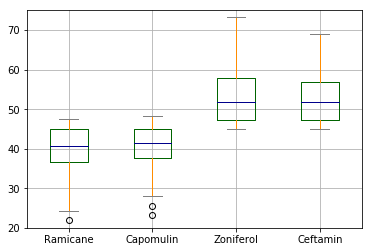

In [159]:

color = dict(boxes  = 'DarkGreen',whiskers = 'DarkOrange',medians = 'DarkBlue',caps ='Gray')

fin4.plot.box(ylim = [20,75],   # y轴刻度范围
            grid = True,
            color  = color,   # color 样式填充
           )

## Line and Scatter Plots

In [163]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
temp_data = clean_mice_info.loc[clean_mice_info["Drug Regimen"] == 'Capomulin', :]
temp_data.head()
s185_data = temp_data.loc[temp_data["Mouse ID"] == 's185', :]
s185_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


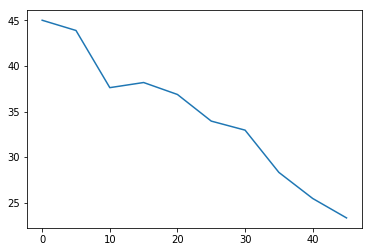

In [164]:
plt.plot(list(s185_data['Timepoint']), list(s185_data['Tumor Volume (mm3)']))
plt.show()

In [183]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Build basic df
stat_df = pd.DataFrame(columns={'Mouse ID':"",'avg vol':"",'weight':""},index=[0])
stat_df

,Mouse ID,avg vol,weight
0,NaN,NaN,NaN


In [184]:
temp_data.head()
i = 0
for ids in temp_data['Mouse ID'].unique():
    stat_df.loc[i,'Mouse ID']= ids
    stat_df.loc[i,'avg vol'] = temp_data.loc[temp_data["Mouse ID"] == ids, :]["Tumor Volume (mm3)"].mean()
    stat_df.loc[i,'weight']= temp_data.loc[temp_data["Mouse ID"] == ids, :]["Weight (g)"].unique()[0]
    i = i+1
#     stat_df[i,'avg weight'] = isd
stat_df   


,Mouse ID,avg vol,weight
0,s185,34.5591,17
1,x401,36.182,15
2,m601,34.8475,17
3,f966,36.506,17
4,u364,39.8875,17
5,y793,38.5068,17
6,r554,36.5092,17
7,m957,39.0498,19
8,t565,39.3287,17
9,i738,39.1411,20


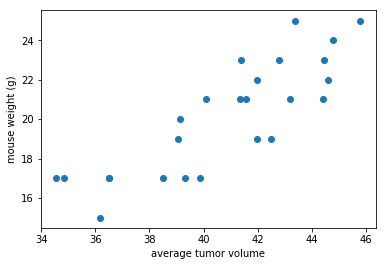

In [185]:
plt.scatter(stat_df.iloc[:,1],stat_df.iloc[:,2])
plt.xlabel('average tumor volume')
plt.ylabel('mouse weight (g)')
plt.show()

## Correlation and Regression

In [196]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values=list(stat_df.iloc[:,1])
y_values=list(stat_df.iloc[:,2])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = 0.74x + -10.15'

In [195]:
pvalue

1.3225722434712478e-07